In [2]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import matplotlib
import numpy as np

In [3]:
dataPath = "data/atp_matches_2019.csv"

data = pd.read_csv(dataPath) 
print(data)

                           tourney_id                  tourney_name surface  \
0                           2019-M020                      Brisbane    Hard   
1                           2019-M020                      Brisbane    Hard   
2                           2019-M020                      Brisbane    Hard   
3                           2019-M020                      Brisbane    Hard   
4                           2019-M020                      Brisbane    Hard   
...                               ...                           ...     ...   
2776  2019-M-DC-2019-QLS-M-SUI-RUS-01  Davis Cup QLS R1: SUI vs RUS    Hard   
2777  2019-M-DC-2019-QLS-M-SUI-RUS-01  Davis Cup QLS R1: SUI vs RUS    Hard   
2778  2019-M-DC-2019-QLS-M-SWE-COL-01  Davis Cup QLS R1: SWE vs COL    Clay   
2779  2019-M-DC-2019-QLS-M-SWE-COL-01  Davis Cup QLS R1: SWE vs COL    Clay   
2780  2019-M-DC-2019-QLS-M-SWE-COL-01  Davis Cup QLS R1: SWE vs COL    Clay   

      draw_size tourney_level  tourney_date  match_

In [4]:
import pickle

with open("data/data_cleaned_2019", 'wb') as file:
    pickle.dump(data, file)

In [5]:
import pickle

with open("data/data_cleaned_2019", 'rb') as file:
    data = pickle.load(file)

In [6]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())

skup_id = list_winner.union(list_looser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

Postoji 364 različitih igrača


In [7]:
import numpy as np
import matplotlib.pyplot as plt

data['id'] = data.index

data_reduced = data[['winner_name', 'loser_name', 'winner_rank','loser_rank', 'winner_ioc', 'loser_ioc', 'id' ]]
print(data_reduced)

             winner_name           loser_name  winner_rank  loser_rank  \
0          Kei Nishikori      Daniil Medvedev          9.0        16.0   
1        Daniil Medvedev   Jo-Wilfried Tsonga         16.0       239.0   
2          Kei Nishikori        Jeremy Chardy          9.0        40.0   
3     Jo-Wilfried Tsonga       Alex De Minaur        239.0        31.0   
4        Daniil Medvedev         Milos Raonic         16.0        18.0   
...                  ...                  ...          ...         ...   
2776     Karen Khachanov  Marc Andrea Huesler         11.0       362.0   
2777     Karen Khachanov      Henri Laaksonen         11.0       142.0   
2778    Santiago Giraldo           Elias Ymer        251.0       116.0   
2779  Daniel Elahi Galan          Mikael Ymer        228.0       194.0   
2780  Alejandro Gonzalez           Elias Ymer        337.0       116.0   

     winner_ioc loser_ioc    id  
0           JPN       RUS     0  
1           RUS       FRA     1  
2        

In [8]:
list_nations = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_ioc']
        list_nations.append((result.iloc[0]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_ioc']
        list_nations.append((result.iloc[0]))
    print(list_nations)

Lloyd Harris
['RSA']
Alen Avidzba
['RSA', 'RUS']
Franko Skugor
['RSA', 'RUS', 'CRO']
Emilio Nava
['RSA', 'RUS', 'CRO', 'USA']
Andreas Seppi
['RSA', 'RUS', 'CRO', 'USA', 'ITA']
Laslo Djere
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB']
Blaz Rola
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO']
Filip Horansky
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK']
Ilya Ivashka
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR']
Viktor Troicki
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB']
Thiemo De Bakker
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED']
Jc Aragone
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA']
Markus Eriksson
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA', 'SWE']
Alexey Vatutin
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA', 'SWE', 'RUS']
Federico Delbonis
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 

['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA', 'SWE', 'RUS', 'ARG', 'ZIM', 'VEN', 'IND', 'ITA', 'AUS', 'HKG', 'FRA', 'TPE', 'MEX', 'GBR', 'KOR', 'HKG', 'AUT', 'CZE', 'EGY', 'ITA', 'USA', 'AUT', 'LTU', 'SVK', 'ITA', 'HUN', 'UZB', 'JPN', 'GBR', 'ARG', 'JPN', 'DEN', 'NED', 'HUN', 'ISR', 'UKR', 'FIN', 'RSA', 'MEX', 'BOL', 'USA', 'ESP', 'BRA', 'LIB', 'USA', 'JPN', 'USA', 'GBR', 'RUS', 'UKR', 'POL', 'RUS', 'UZB', 'FRA', 'GER', 'GBR', 'INA', 'FIN', 'ISR', 'GRE', 'ESP', 'ROU', 'MEX', 'PER', 'JPN', 'GER']
Denis Shapovalov
['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA', 'SWE', 'RUS', 'ARG', 'ZIM', 'VEN', 'IND', 'ITA', 'AUS', 'HKG', 'FRA', 'TPE', 'MEX', 'GBR', 'KOR', 'HKG', 'AUT', 'CZE', 'EGY', 'ITA', 'USA', 'AUT', 'LTU', 'SVK', 'ITA', 'HUN', 'UZB', 'JPN', 'GBR', 'ARG', 'JPN', 'DEN', 'NED', 'HUN', 'ISR', 'UKR', 'FIN', 'RSA', 'MEX', 'BOL', 'USA', 'ESP', 'BRA', 'LIB', 'USA', 'JPN', 'USA', 'GBR', 'RUS', 'UKR', 'POL', 'RUS', '

['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA', 'SWE', 'RUS', 'ARG', 'ZIM', 'VEN', 'IND', 'ITA', 'AUS', 'HKG', 'FRA', 'TPE', 'MEX', 'GBR', 'KOR', 'HKG', 'AUT', 'CZE', 'EGY', 'ITA', 'USA', 'AUT', 'LTU', 'SVK', 'ITA', 'HUN', 'UZB', 'JPN', 'GBR', 'ARG', 'JPN', 'DEN', 'NED', 'HUN', 'ISR', 'UKR', 'FIN', 'RSA', 'MEX', 'BOL', 'USA', 'ESP', 'BRA', 'LIB', 'USA', 'JPN', 'USA', 'GBR', 'RUS', 'UKR', 'POL', 'RUS', 'UZB', 'FRA', 'GER', 'GBR', 'INA', 'FIN', 'ISR', 'GRE', 'ESP', 'ROU', 'MEX', 'PER', 'JPN', 'GER', 'CAN', 'SRB', 'ESP', 'USA', 'GER', 'DEN', 'AUS', 'GBR', 'CRO', 'BIH', 'SWE', 'CRO', 'PHI', 'CZE', 'ESP', 'CZE', 'ARG', 'FRA', 'SRB', 'BEL', 'INA', 'AUS', 'CAN', 'USA', 'ESA', 'THA', 'GBR', 'USA', 'CAN', 'DOM', 'USA', 'AUT', 'AUS', 'JPN', 'BIH', 'ZIM', 'UZB', 'GER', 'ITA', 'FRA', 'USA', 'GER', 'MON', 'AUT', 'FRA', 'FRA', 'BEL', 'ITA', 'USA', 'BIH', 'RUS', 'USA', 'HUN', 'AUS', 'ESP', 'SUI', 'GER', 'ECU', 'AUS', 'BRA', 'FRA', 'ESP', 'BUL', 'CHN', 'ITA', 'CAN'

['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA', 'SWE', 'RUS', 'ARG', 'ZIM', 'VEN', 'IND', 'ITA', 'AUS', 'HKG', 'FRA', 'TPE', 'MEX', 'GBR', 'KOR', 'HKG', 'AUT', 'CZE', 'EGY', 'ITA', 'USA', 'AUT', 'LTU', 'SVK', 'ITA', 'HUN', 'UZB', 'JPN', 'GBR', 'ARG', 'JPN', 'DEN', 'NED', 'HUN', 'ISR', 'UKR', 'FIN', 'RSA', 'MEX', 'BOL', 'USA', 'ESP', 'BRA', 'LIB', 'USA', 'JPN', 'USA', 'GBR', 'RUS', 'UKR', 'POL', 'RUS', 'UZB', 'FRA', 'GER', 'GBR', 'INA', 'FIN', 'ISR', 'GRE', 'ESP', 'ROU', 'MEX', 'PER', 'JPN', 'GER', 'CAN', 'SRB', 'ESP', 'USA', 'GER', 'DEN', 'AUS', 'GBR', 'CRO', 'BIH', 'SWE', 'CRO', 'PHI', 'CZE', 'ESP', 'CZE', 'ARG', 'FRA', 'SRB', 'BEL', 'INA', 'AUS', 'CAN', 'USA', 'ESA', 'THA', 'GBR', 'USA', 'CAN', 'DOM', 'USA', 'AUT', 'AUS', 'JPN', 'BIH', 'ZIM', 'UZB', 'GER', 'ITA', 'FRA', 'USA', 'GER', 'MON', 'AUT', 'FRA', 'FRA', 'BEL', 'ITA', 'USA', 'BIH', 'RUS', 'USA', 'HUN', 'AUS', 'ESP', 'SUI', 'GER', 'ECU', 'AUS', 'BRA', 'FRA', 'ESP', 'BUL', 'CHN', 'ITA', 'CAN'

['RSA', 'RUS', 'CRO', 'USA', 'ITA', 'SRB', 'SLO', 'SVK', 'BLR', 'SRB', 'NED', 'USA', 'SWE', 'RUS', 'ARG', 'ZIM', 'VEN', 'IND', 'ITA', 'AUS', 'HKG', 'FRA', 'TPE', 'MEX', 'GBR', 'KOR', 'HKG', 'AUT', 'CZE', 'EGY', 'ITA', 'USA', 'AUT', 'LTU', 'SVK', 'ITA', 'HUN', 'UZB', 'JPN', 'GBR', 'ARG', 'JPN', 'DEN', 'NED', 'HUN', 'ISR', 'UKR', 'FIN', 'RSA', 'MEX', 'BOL', 'USA', 'ESP', 'BRA', 'LIB', 'USA', 'JPN', 'USA', 'GBR', 'RUS', 'UKR', 'POL', 'RUS', 'UZB', 'FRA', 'GER', 'GBR', 'INA', 'FIN', 'ISR', 'GRE', 'ESP', 'ROU', 'MEX', 'PER', 'JPN', 'GER', 'CAN', 'SRB', 'ESP', 'USA', 'GER', 'DEN', 'AUS', 'GBR', 'CRO', 'BIH', 'SWE', 'CRO', 'PHI', 'CZE', 'ESP', 'CZE', 'ARG', 'FRA', 'SRB', 'BEL', 'INA', 'AUS', 'CAN', 'USA', 'ESA', 'THA', 'GBR', 'USA', 'CAN', 'DOM', 'USA', 'AUT', 'AUS', 'JPN', 'BIH', 'ZIM', 'UZB', 'GER', 'ITA', 'FRA', 'USA', 'GER', 'MON', 'AUT', 'FRA', 'FRA', 'BEL', 'ITA', 'USA', 'BIH', 'RUS', 'USA', 'HUN', 'AUS', 'ESP', 'SUI', 'GER', 'ECU', 'AUS', 'BRA', 'FRA', 'ESP', 'BUL', 'CHN', 'ITA', 'CAN'

In [9]:
list_rank_points = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank_points']
        list_rank_points.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank_points']
        list_rank_points.append((result.iloc[-1]))
for i in range(len(list_rank_points)):
        if(np.isnan(list_rank_points[i])):
            list_rank_points[i] = 0
for i in range(0, len(list_rank_points)): 
    list_rank_points[i] = int(list_rank_points[i])

Lloyd Harris
Alen Avidzba
Franko Skugor
Emilio Nava
Andreas Seppi
Laslo Djere
Blaz Rola
Filip Horansky
Ilya Ivashka
Viktor Troicki
Thiemo De Bakker
Jc Aragone
Markus Eriksson
Alexey Vatutin
Federico Delbonis
Mehluli Don Ayanda Sibanda
Juan Lugo
Sumit Nagal
Gian Marco Moroni
John Millman
Chak Lam Coleman Wong
Adrian Mannarino
Tung Lin Wu
Gerardo Lopez Villasenor
Rhett Purcell
Duck Hee Lee
Pak Long Yeung
Dennis Novak
Lukas Rosol
Mohamed Safwat
Gianluca Mager
Kyle Johnson
Sebastian Ofner
Laurynas Grigelis
Norbert Gombos
Matteo Berrettini
Zsombor Piros
Sanjar Fayziev
Yoshihito Nishioka
James Ward
Pedro Cachin
Go Soeda
Mikael Torpegaard
Tallon Griekspoor
Marton Fucsovics
Edan Leshem
Illya Marchenko
Patrik Niklas Salminen
Ruan Roelofse
Manuel Sanchez
Federico Zeballos
Bradley Klahn
Marcel Granollers
Thiago Monteiro
Hady Habib
Tim Smyczek
Taro Daniel
Donald Young
Alastair Gray
Artem Dubrivnyy
Sergiy Stakhovsky
Kamil Majchrzak
Andrey Rublev
Denis Istomin
Pierre Hugues Herbert
Tobias Kamke
Andy

In [10]:
list_rank = []
for i in skup_id:
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank']
        list_rank.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank']
        list_rank.append((result.iloc[-1]))
for i in range(len(list_rank)):
        if(np.isnan(list_rank[i])):
            list_rank[i] = 0

for i in range(0, len(list_rank)): 
    list_rank[i] = int(list_rank[i])

In [11]:
G = nx.Graph() # pravi praznu mrežu
for i in range(len(skup_id)):
    G.add_node(list(skup_id)[i], ioc = list_nations[i], rankpoints = list_rank_points[i], rank = list_rank[i] ) # dodaje čvorove čije su labele u "skup_id"

In [12]:
for _, winner_name, loser_name, winner_rank, loser_rank, winner_ioc, loser_ioc, _  in data_reduced.itertuples():
    if (winner_name, loser_name) in G.edges:
        G.edges[winner_name, loser_name]['weight'] += 1
    else:
        G.add_edge(winner_name, loser_name, weight=1)

In [13]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 364
Number of edges: 2378
Average degree:  13.0659


In [14]:
G.nodes.data()

NodeDataView({'Lloyd Harris': {'ioc': 'RSA', 'rankpoints': 510, 'rank': 113}, 'Alen Avidzba': {'ioc': 'RUS', 'rankpoints': 59, 'rank': 498}, 'Franko Skugor': {'ioc': 'CRO', 'rankpoints': 63, 'rank': 351}, 'Emilio Nava': {'ioc': 'USA', 'rankpoints': 0, 'rank': 0}, 'Andreas Seppi': {'ioc': 'ITA', 'rankpoints': 1080, 'rank': 37}, 'Laslo Djere': {'ioc': 'SRB', 'rankpoints': 1290, 'rank': 32}, 'Blaz Rola': {'ioc': 'SLO', 'rankpoints': 416, 'rank': 133}, 'Filip Horansky': {'ioc': 'SVK', 'rankpoints': 235, 'rank': 219}, 'Ilya Ivashka': {'ioc': 'BLR', 'rankpoints': 411, 'rank': 135}, 'Viktor Troicki': {'ioc': 'SRB', 'rankpoints': 327, 'rank': 167}, 'Thiemo De Bakker': {'ioc': 'NED', 'rankpoints': 220, 'rank': 224}, 'Jc Aragone': {'ioc': 'USA', 'rankpoints': 162, 'rank': 265}, 'Markus Eriksson': {'ioc': 'SWE', 'rankpoints': 155, 'rank': 280}, 'Alexey Vatutin': {'ioc': 'RUS', 'rankpoints': 248, 'rank': 197}, 'Federico Delbonis': {'ioc': 'ARG', 'rankpoints': 846, 'rank': 67}, 'Mehluli Don Ayanda 

In [19]:
output_path = "models/undirected_2019_country_rank.gml"

nx.write_gml(G, output_path)

In [20]:
data_average = data[['winner_name', 'loser_name', 'tourney_id']]
print(data_average)

             winner_name           loser_name                       tourney_id
0          Kei Nishikori      Daniil Medvedev                        2019-M020
1        Daniil Medvedev   Jo-Wilfried Tsonga                        2019-M020
2          Kei Nishikori        Jeremy Chardy                        2019-M020
3     Jo-Wilfried Tsonga       Alex De Minaur                        2019-M020
4        Daniil Medvedev         Milos Raonic                        2019-M020
...                  ...                  ...                              ...
2776     Karen Khachanov  Marc Andrea Huesler  2019-M-DC-2019-QLS-M-SUI-RUS-01
2777     Karen Khachanov      Henri Laaksonen  2019-M-DC-2019-QLS-M-SUI-RUS-01
2778    Santiago Giraldo           Elias Ymer  2019-M-DC-2019-QLS-M-SWE-COL-01
2779  Daniel Elahi Galan          Mikael Ymer  2019-M-DC-2019-QLS-M-SWE-COL-01
2780  Alejandro Gonzalez           Elias Ymer  2019-M-DC-2019-QLS-M-SWE-COL-01

[2781 rows x 3 columns]


In [21]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())
list_tournament = set(data['tourney_id'].unique())

skup_id_turnir = list_winner.union(list_looser)
skup_id_turnir = skup_id_turnir.union(list_tournament)
print(f"Postoji { len(skup_id_turnir) } različitih igrača") # formatiranje ispisa pomoću fstring
print(skup_id_turnir)

Postoji 490 različitih igrača
{'Christian Garin', 'Lloyd Harris', 'Emilio Gomez', '2019-M-DC-2019-FLS-D-M-AUS-COL-01', 'Corentin Moutet', 'Philip Henning', '2019-9158', '2019-0568', 'Wai Yu Kai', 'Alen Avidzba', 'Franko Skugor', 'Emilio Nava', '2019-M-DC-2019-QLS-M-JPN-CHN-01', 'Andreas Seppi', 'Laslo Djere', 'Leonardo Mayer', '2019-M-DC-2019-G1-EPA-M-CZE-BIH-01', 'Filippo Baldi', '2019-M-DC-2019-FLS-C-M-GER-CHI-01', '2019-M-DC-2019-QLS-M-CZE-NED-01', 'Hugo Dellien', 'Santiago Giraldo', 'Luca Vanni', 'Gabriel Donev', '2019-M-DC-2019-QLS-M-SWE-COL-01', 'Blaz Rola', '2019-M-DC-2019-G1-EPA-M-AUT-FIN-01', 'Arjun Kadhe', 'Filip Horansky', '2019-0308', '2019-540', 'Joao Domingues', '2019-5014', '2019-M-DC-2019-FLS-E-M-GBR-NED-01', 'Ilya Ivashka', 'Andrej Martin', 'Antoine Hoang', 'Zhizhen Zhang', '2019-M-DC-2019-G1-AM-M-DOM-URU-01', '2019-6116', '2019-M007', 'Viktor Troicki', 'Palaphoom Kovapitukted', 'Thiemo De Bakker', 'Gilles Simon', 'Jc Aragone', 'Markus Eriksson', 'Alexey Vatutin', '201

In [22]:
M = nx.Graph() # pravi praznu mrežu
M.add_nodes_from(skup_id_turnir) # dodaje čvorove čije su labele u "skup_id"

In [23]:
for _, winner_name, loser_name , tourney_id in data_average.itertuples():
    if (winner_name, tourney_id) in M.edges:
        M.edges[winner_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(winner_name, tourney_id, weight=1)
    if (loser_name, tourney_id) in M.edges:
        M.edges[loser_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(loser_name, tourney_id, weight=1)

In [24]:
print(M.edges.data("weight"))

[('Christian Garin', '2019-580', 1), ('Christian Garin', '2019-0506', 2), ('Christian Garin', '2019-6932', 2), ('Christian Garin', '2019-0533', 5), ('Christian Garin', '2019-0717', 5), ('Christian Garin', '2019-0425', 3), ('Christian Garin', '2019-0308', 5), ('Christian Garin', '2019-0322', 1), ('Christian Garin', '2019-520', 2), ('Christian Garin', '2019-M010', 3), ('Christian Garin', '2019-0311', 1), ('Christian Garin', '2019-540', 1), ('Christian Garin', '2019-0316', 1), ('Christian Garin', '2019-0414', 1), ('Christian Garin', '2019-7480', 1), ('Christian Garin', '2019-0421', 3), ('Christian Garin', '2019-M024', 1), ('Christian Garin', '2019-560', 2), ('Christian Garin', '2019-7581', 3), ('Christian Garin', '2019-M015', 1), ('Christian Garin', '2019-5014', 2), ('Christian Garin', '2019-M014', 1), ('Christian Garin', '2019-0328', 1), ('Christian Garin', '2019-0352', 4), ('Christian Garin', '2019-M-DC-2019-FLS-C-M-ARG-CHI-01', 1), ('Christian Garin', '2019-M-DC-2019-FLS-C-M-GER-CHI-01

In [25]:
output_path = "models/undirected_average_model_2019.gml"

nx.write_gml(M, output_path)

In [108]:
res = max(set(list_nations), key = list_nations.count)
print(res)

count = list_nations.count(res)
print(count)

USA
31


In [114]:
ER = nx.erdos_renyi_graph(len(skup_id), 0.035)
print(nx.info(ER))

Name: 
Type: Graph
Number of nodes: 364
Number of edges: 2356
Average degree:  12.9451


In [110]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 364
Number of edges: 2378
Average degree:  13.0659


In [115]:
print(nx.average_shortest_path_length(ER))

2.581040171949263


In [116]:
for g in nx.connected_component_subgraphs(G): 
    print(nx.average_shortest_path_length(g))
    print(nx.info(g))

3.0460462005453515
Name: 
Type: Graph
Number of nodes: 342
Number of edges: 2366
Average degree:  13.8363
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.3333333333333333
Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.3333333333333333
Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


In [117]:
Duzina = 3.0460462005453515/2.581040171949263
Duzina

1.1801622592510463

In [118]:
import networkx.algorithms.approximation
ccER = nx.algorithms.approximation.clustering_coefficient.average_clustering(ER)
ccG = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)

ccG/ccER

3.967741935483871

### Novak Djokovic

Čvorovi ego mreže igrača crraii su ['Salvatore Caruso', 'Henri Laaksonen', 'Jo-Wilfried Tsonga', 'Hubert Hurkacz', 'Daniil Medvedev', 'Matteo Berrettini', 'Jeremy Chardy', 'Corentin Moutet', 'Taylor Fritz', 'Marin Cilic', 'Karen Khachanov', 'Yoshihito Nishioka', 'Rafael Nadal', 'Juan Ignacio Londero', 'Alexei Popyrin', 'Stefanos Tsitsipas', 'Kyle Edmund', 'Go Soeda', 'John Millman', 'Marton Fucsovics', 'Philipp Kohlschreiber', 'Sam Querrey', 'David Goffin', 'Benoit Paire', 'Bernard Tomic', 'Nikoloz Basilashvili', 'John Isner', 'Denis Shapovalov', 'Juan Martin del Potro', 'Mitchell Krueger', 'Roberto Bautista Agut', 'Stan Wawrinka', 'Jan Lennard Struff', 'Denis Kudla', 'Roger Federer', 'Kei Nishikori', 'Novak Djokovic', 'Alexander Zverev', 'Bjorn Fratangelo', 'Diego Schwartzman', 'Dominic Thiem', 'Pablo Carreno Busta', 'Lucas Pouille', 'Roberto Carballes Baena', 'Grigor Dimitrov', 'Damir Dzumhur', 'Federico Delbonis', 'Ugo Humbert']


{('Salvatore Caruso',
  'Novak Djokovic'): Text(0.5000000019473777, -0.5000000018833138, '1'),
 ('Salvatore Caruso',
  'Corentin Moutet'): Text(0.8043807097317897, 0.3966766543232846, '1'),
 ('Henri Laaksonen',
  'Novak Djokovic'): Text(0.4957224448288613, -0.4347369021607022, '1'),
 ('Henri Laaksonen',
  'Denis Shapovalov'): Text(0.03378268850447791, -0.12607861639417248, '1'),
 ('Henri Laaksonen',
  'Jan Lennard Struff'): Text(0.24572248451156134, -0.36774962633574776, '1'),
 ('Henri Laaksonen',
  'Benoit Paire'): Text(-2.131748777500775e-09, 0.13052613607395103, '1'),
 ('Henri Laaksonen',
  'Daniil Medvedev'): Text(0.9287351313558305, 0.31526309501432703, '1'),
 ('Henri Laaksonen',
  'Karen Khachanov'): Text(0.6251319750983056, 0.5482260004974688, '1'),
 ('Jo-Wilfried Tsonga',
  'Daniil Medvedev'): Text(0.9159755948991455, 0.379409516622439, '2'),
 ('Jo-Wilfried Tsonga',
  'Novak Djokovic'): Text(0.48296290837217626, -0.37059048055259025, '1'),
 ('Jo-Wilfried Tsonga',
  'Jeremy Char

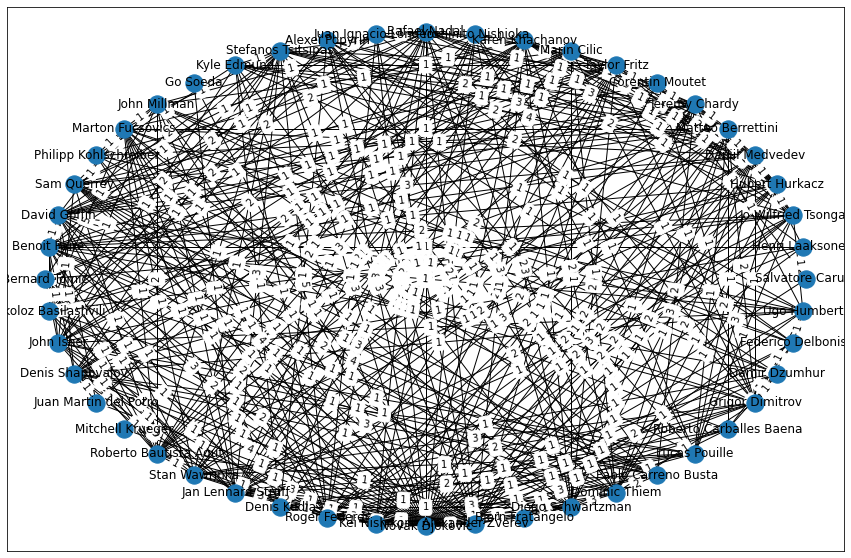

In [48]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Novak Djokovic')
print(f"Čvorovi ego mreže igrača crraii su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [49]:
output_path = "models/Novak_2019.gml"

nx.write_gml(ego_mreza, output_path)

In [50]:
Ego_node_Novak = G
for i in range(len(list(ego_mreza.nodes))):
    Ego_node_Novak = nx.contracted_nodes(Ego_node_Novak, 'Novak Djokovic', list(ego_mreza.nodes)[i])

for (n, d) in Ego_node_Novak.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Novak_2019_egonode.gml"

nx.write_gml(Ego_node_Novak, output_path)

### Rafael Nadal

In [44]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_nadal = nx.ego_graph(G, 'Rafael Nadal')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_nadal,'weight')
pos = nx.circular_layout(ego_mreza_nadal)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
#nx.draw_networkx(ego_mreza, pos)
#nx.draw_networkx_edge_labels(ego_mreza_nadal, pos, edge_labels = tezine_grana)

<Figure size 1080x720 with 0 Axes>

In [45]:
output_path = "models/Nadal_2019.gml"

nx.write_gml(ego_mreza_nadal, output_path)

In [47]:
Ego_node_Nadal = G
for i in range(len(list(ego_mreza_nadal.nodes))):
    Ego_node_Nadal = nx.contracted_nodes(Ego_node_Nadal, 'Rafael Nadal', list(ego_mreza_nadal.nodes)[i])

for (n, d) in Ego_node_Nadal.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Nadal_2019_egonode.gml"

nx.write_gml(Ego_node_Nadal, output_path)

### Roger Federer

C:\Users\Djole\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{('Jo-Wilfried Tsonga',
  'Daniil Medvedev'): Text(0.8923996981120796, 0.3098749532617448, '2'),
 ('Jo-Wilfried Tsonga',
  'Alex De Minaur'): Text(0.41683524639029346, -0.49303510929252403, '1'),
 ('Jo-Wilfried Tsonga',
  'Novak Djokovic'): Text(0.61590999972915, -0.48637935660994047, '1'),
 ('Jo-Wilfried Tsonga',
  'Pierre Hugues Herbert'): Text(0.48329250702738785, 0.49972078414098337, '2'),
 ('Jo-Wilfried Tsonga',
  'Radu Albot'): Text(0.3518622196444964, -0.47755125303612483, '1'),
 ('Jo-Wilfried Tsonga',
  'Andrey Rublev'): Text(0.4168353357972609, 0.4930351397289384, '2'),
 ('Jo-Wilfried Tsonga',
  'Lorenzo Sonego'): Text(0.9822345971427506, -0.13209769145164685, '2'),
 ('Jo-Wilfried Tsonga',
  'Kyle Edmund'): Text(0.17718609874024782, 0.3818261342148654, '2'),
 ('Jo-Wilfried Tsonga',
  'Taylor Fritz'): Text(0.7402908643757637, 0.43847498485789765, '1'),
 ('Jo-Wilfried Tsonga',
  'Peter Gojowczyk'): Text(0.7965898506538778, 0.4025350230578789, '1'),
 ('Jo-Wilfried Tsonga',
  'Kei

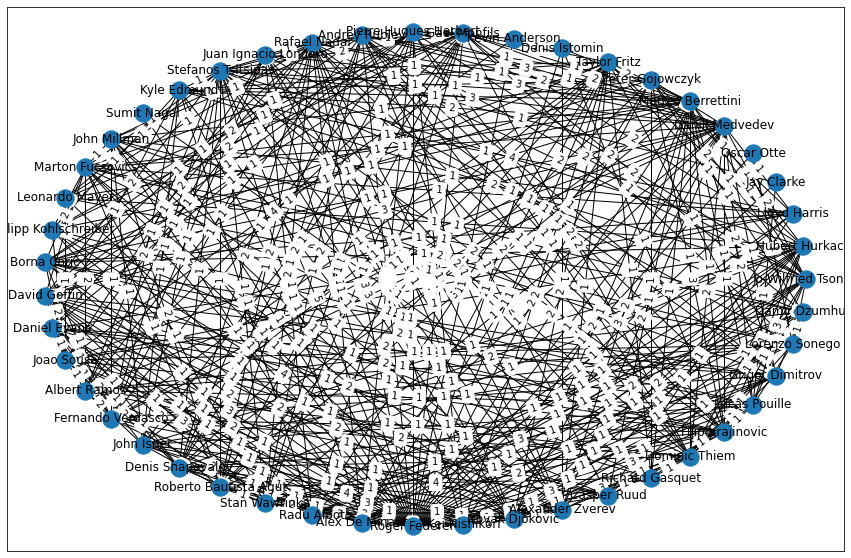

In [38]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_roger = nx.ego_graph(G, 'Roger Federer')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_roger,'weight')
pos = nx.circular_layout(ego_mreza_roger)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza_roger, pos)
nx.draw_networkx_edge_labels(ego_mreza_roger, pos, edge_labels = tezine_grana)

In [39]:
output_path = "models/Roger_2019.gml"

nx.write_gml(ego_mreza_roger, output_path)

In [40]:
Ego_node_Roger = G
for i in range(len(list(ego_mreza_roger.nodes))):
    Ego_node_Roger = nx.contracted_nodes(Ego_node_Roger, 'Roger Federer', list(ego_mreza_roger.nodes)[i])

for (n, d) in Ego_node_Roger.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Roger_2019_egonode.gml"

nx.write_gml(Ego_node_Roger, output_path)

### Distribucija

In [27]:
#25
list_tournament = set(data['tourney_name'].unique())

In [28]:
list_surface = []
for i in list_tournament:
    print(i)
    result = data[(data['tourney_name'] == i)]['surface']
    list_surface.append((result.iloc[-1]))
    print(list_surface)

Houston
['Clay']
Metz
['Clay', 'Hard']
Davis Cup Finals RR: FRA vs JPN
['Clay', 'Hard', 'Hard']
Halle
['Clay', 'Hard', 'Hard', 'Grass']
Davis Cup QLS R1: AUT vs CHI
['Clay', 'Hard', 'Hard', 'Grass', 'Clay']
St. Petersburg
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard']
Davis Cup Finals RR: KAZ vs NED
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard']
Eastbourne
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard', 'Grass']
Davis Cup Finals RR: BEL vs AUS
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard', 'Grass', 'Hard']
Doha
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard', 'Grass', 'Hard', 'Hard']
Davis Cup G1 R1: HUN vs UKR
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay']
Davis Cup Finals RR: AUS vs COL
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay', 'Hard']
Dubai
['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard']
Da

['Clay', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Hard', 'Grass', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Clay', 'Clay', 'Hard', 'Clay', 'Hard', 'Clay', 'Clay', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Grass', 'Hard', 'Hard', 'Grass', 'Clay', 'Hard', 'Clay', 'Clay', 'Clay', 'Hard', 'Hard', 'Clay', 'Clay', 'Grass', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Grass', 'Hard', 'Clay', 'Grass', 'Hard', 'Clay', 'Clay', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Clay', 'Hard', 'Hard', 'Clay', 'Grass', 'Hard', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Hard', 'Clay', 'Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Hard']
Antwerp
['Clay', 'Hard'

In [29]:
d = {'name': list(list_tournament), 'surface': list_surface}
df = pd.DataFrame(data=d)

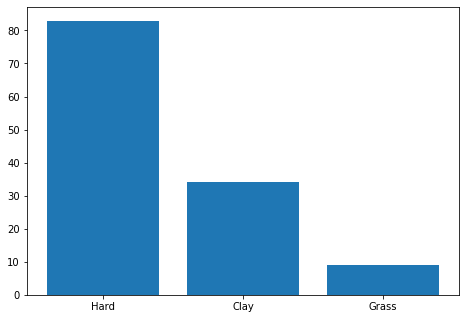

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = ['Hard', 'Clay', 'Grass']
value = [df[(df['surface'] == 'Hard')].count().surface,df[(df['surface'] == 'Clay')].count().surface,df[(df['surface'] == 'Grass')].count().surface]
ax.bar(name, value)
plt.show()

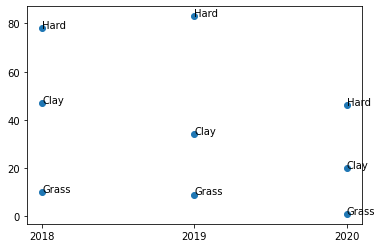

In [36]:
y = np.array([78,47,10,df[(df['surface'] == 'Hard')].count().surface,df[(df['surface'] == 'Clay')].count().surface,df[(df['surface'] == 'Grass')].count().surface, 46, 20, 1])
x = np.array([2018,2018,2018,2019,2019,2019, 2020, 2020, 2020])
n = ['Hard', 'Clay', 'Grass', 'Hard', 'Clay', 'Grass', 'Hard', 'Clay', 'Grass']

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.scatter(x, y)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [31]:
#26
dd = {'Matches': data['tourney_name'], 'surface': data['surface']}
dff = pd.DataFrame(data=dd)

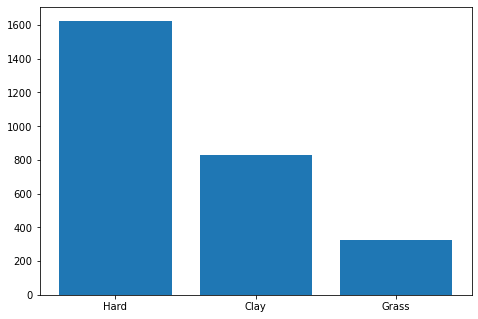

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = ['Hard', 'Clay', 'Grass']
value = [dff[(dff['surface'] == 'Hard')].count().surface,dff[(dff['surface'] == 'Clay')].count().surface,dff[(dff['surface'] == 'Grass')].count().surface]
ax.bar(name, value)
plt.show()

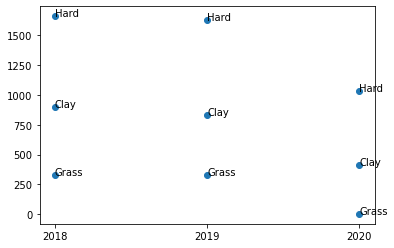

In [35]:
y = np.array([1661,897,331,dff[(dff['surface'] == 'Hard')].count().surface,dff[(dff['surface'] == 'Clay')].count().surface,dff[(dff['surface'] == 'Grass')].count().surface, 1031, 414, 2])
x = np.array([2018,2018,2018,2019,2019,2019, 2020, 2020, 2020])
n = ['Hard', 'Clay', 'Grass', 'Hard', 'Clay', 'Grass', 'Hard', 'Clay', 'Grass']

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.scatter(x, y)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

### Centralnost mreze 

In [51]:
C_star = (G.number_of_nodes()-1)*(G.number_of_nodes()-1)
C_graph = 0
for i in range(G.number_of_nodes()):
    C_graph += max(list(G.degree), key=lambda x: x[1])[1] - list(G.degree)[i][1]
Cen = C_graph/C_star
Cen

0.1296511319050763

### Mreza Velike trojke

In [52]:
VT = G.copy()
for node in list(G.nodes):
    if not G.has_edge(node, 'Novak Djokovic') and not G.has_edge(node, 'Rafael Nadal') and not G.has_edge(node, 'Roger Federer'):
        print(node)
        VT.remove_node(node)

Alen Avidzba
Franko Skugor
Emilio Nava
Andreas Seppi
Laslo Djere
Blaz Rola
Filip Horansky
Ilya Ivashka
Viktor Troicki
Thiemo De Bakker
Jc Aragone
Markus Eriksson
Alexey Vatutin
Mehluli Don Ayanda Sibanda
Juan Lugo
Gian Marco Moroni
Chak Lam Coleman Wong
Tung Lin Wu
Gerardo Lopez Villasenor
Rhett Purcell
Duck Hee Lee
Pak Long Yeung
Dennis Novak
Lukas Rosol
Mohamed Safwat
Gianluca Mager
Kyle Johnson
Sebastian Ofner
Laurynas Grigelis
Norbert Gombos
Zsombor Piros
Sanjar Fayziev
James Ward
Pedro Cachin
Mikael Torpegaard
Tallon Griekspoor
Edan Leshem
Illya Marchenko
Patrik Niklas Salminen
Ruan Roelofse
Manuel Sanchez
Federico Zeballos
Bradley Klahn
Marcel Granollers
Thiago Monteiro
Hady Habib
Tim Smyczek
Taro Daniel
Donald Young
Alastair Gray
Artem Dubrivnyy
Sergiy Stakhovsky
Kamil Majchrzak
Tobias Kamke
Andy Murray
Fitriadi M Rifqi
Harri Heliovaara
Amir Weintraub
Adrian Menendez Maceiras
Filip Cristian Jianu
Lucas Gomez
Nicolas Alvarez
Maximilian Marterer
Miomir Kecmanovic
Zachary Svajda
Du

In [53]:
print(nx.info(VT))
print(nx.info(G))
proc = VT.number_of_nodes()/G.number_of_nodes()
proc

Name: 
Type: Graph
Number of nodes: 88
Number of edges: 907
Average degree:  20.6136
Name: 
Type: Graph
Number of nodes: 364
Number of edges: 2378
Average degree:  13.0659


0.24175824175824176